# Hello Spark Demo

**Local Spark Cluster**

Import dependencies:

In [1]:
import operator 
import pyspark

Init Spark session:

In [2]:
def init_spark():
  session = SparkSession.builder.appName("HelloSparkApp").getOrCreate()
  cntx = session.sparkContext

  return session,cntx

session,cntx = init_spark()
spark

## Let's start!

In [3]:
nums = cntx.parallelize(range(0, 11))

print(nums.map(lambda x: x*x).collect())

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


## Word count calculator

Get a RDD containing lines from [AI-Workshop](https://github.com/codez0mb1e/evangelism/tree/master/AI-Workshop):

In [4]:
lines = sc.textFile('../../AI-Workshop/README.md')
lines.take(10)

['# AI Workshop',
 '',
 '',
 '## Machine Learning',
 'В первой части интенсива разберемся с тем, что представляет собой дисциплина машинное обучение (_machine learning, ML_), в том числе разберем:',
 '* типовые задачи: обучение с учителем, обучение без учителя, обучение с подкреплением;',
 '* наиболее популярные классы алгоритмов: регрессия, классификация, кластеризация;',
 '* интуитивное понимание конкретных алгоритмов: от линейной регрессии до ансамблей деревьев и нейронных сетей.',
 '',
 'Отдельно заострим свое внимание на кейсах успешного применения машинного обучения в различных сферах бизнеса и нашей жизни. В конце первой части проведем практикум по обучению модели машинной обучения на одной из облачных платформ. ']

Get the number of partitions:

In [5]:
numPartitions = lines.getNumPartitions() 
print('Number of partitions storing the dataset: {}'.format(numPartitions))


Number of partitions storing the dataset: 2


In [6]:
# Split each line into words and assign a frequency of 1 to each word
words = lines.flatMap(lambda line: line.split(" "))

# Filter stop words
stop_words = ['', '*', '##', 'и', 'с', 'в','по']
filtered_words = words.filter(lambda x: x.lower() not in stop_words)

# Get word tuples
word_tuples = filtered_words.map(lambda word: (word, 1))

# Count the frequency for words
counts = word_tuples.reduceByKey(operator.add) # equals .reduceByKey(lambda a, b: a + b)

# Sort the counts in descending order based on the word frequency
sorted_counts = counts.sortBy(lambda x: x[1], False)

In [7]:
#Get an iterator over the counts to print a word and its frequency
for word,count in sorted_counts.toLocalIterator():
    print('{} --> {}'.format(word, count))

обучение --> 4
части --> 3
AI --> 3
Learning --> 3
нейронных --> 3
на --> 3
первой --> 2
интенсива --> 2
learning, --> 2
алгоритмов: --> 2
проведем --> 2
из --> 2
облачных --> 2
платформ. --> 2
### --> 2
1. --> 2
3. --> 2
Azure --> 2
или --> 2
том --> 2
числе --> 2
типовые --> 2
успешного --> 2
обучения --> 2
конце --> 2
практикум --> 2
обучению --> 2
Материалы: --> 2
2. --> 2
Microsoft --> 2
[Azure --> 2
4. --> 2
# --> 1
Machine --> 1
дисциплина --> 1
машинное --> 1
(_machine --> 1
учителем, --> 1
без --> 1
учителя, --> 1
подкреплением; --> 1
популярные --> 1
регрессия, --> 1
конкретных --> 1
от --> 1
линейной --> 1
деревьев --> 1
Отдельно --> 1
заострим --> 1
свое --> 1
кейсах --> 1
применения --> 1
машинного --> 1
различных --> 1
бизнеса --> 1
нашей --> 1
жизни. --> 1
одной --> 1
Во --> 1
второй --> 1
остановимся --> 1
нейросетевых --> 1
(_deep --> 1
DL_). --> 1
причины --> 1
сетей, --> 1
применения; --> 1
типы --> 1
сетей: --> 1
распространения, --> 1
нейросети --> 1
лекции --> 1
с

#### Store resut

In [8]:
# import the pyspark sql Row class
from pyspark.sql import Row 

# create a table from Rows
word_counts_rows = sorted_counts.map(lambda p: Row(word=p[0], count=int(p[1])))
word_counts_table = sqlContext.createDataFrame(word_counts_rows) 

# register a temp table for querying
word_counts_table.registerTempTable("word_count")

Get data fron `word_counts_table`:

In [9]:
word_counts_dt = session.sql('SELECT word, count FROM word_count WHERE length(word) > 2 and count > 1')
word_counts_dt.toPandas()

,word,count
0,обучение,4
1,части,3
2,Learning,3
3,нейронных,3
4,первой,2
5,интенсива,2
6,"learning,",2
7,алгоритмов:,2
8,проведем,2
9,облачных,2


### Word cloud

In [10]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

Read word statistics from Spark table and draw **word cloud**:

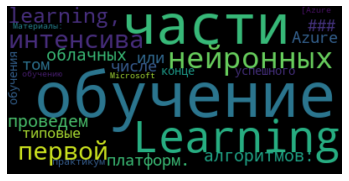

In [11]:
words_stats = word_counts_dt.toPandas()
words_stats = words_stats.set_index('word').to_dict()['count']

# Fit word cloud
wordcloud = WordCloud().fit_words(words_stats)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()